<h4>D11 shopping day sales KPI tracking</h4>
<ul style='color:orange'>
    <li>sales order table</li>
    <li>product sales table</li>
    <li>product master table</li> 
    <li>product inventory table</li>
</ul> 
<p>by category, by sales, by inventory and by time mins/timestamp, totally in the daily base</p>  

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import chardet

with open('downloads/订单销售情况导出-2018-11-10-89.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
salesOrder=pd.read_csv('downloads/订单销售情况导出-2018-11-10-89.csv', 
            encoding=result['encoding']) 
salesOrder.head(2)  

,*:店铺名称,*:订单号,*:销售号,*:货品种数,*:货品数量,*:商品总额,*:商品销售额,*:优惠额,*:物流金额,*:销售价,...,*:毛利率,*:订单创建时间,*:订单支付时间,*:订单发货时间,*:仓库名称,*:附加费,*:物流公司,*:收货人,*:物流单号,*:重量
0,deltaq旗舰店-天猫,253165602744742668,S201811012000004,1,1,86.0,56,30.0,0.0,56.0,...,22%,2018-10-31 22:08:42,2018-10-31 22:08:56,2018-11-01 17:08:13,发网奉贤仓,0,申通E物流,张先生,3382526515535,370.0
1,deltaq旗舰店-天猫,254780672292100839,S201811042000002,2,6,300.0,230,70.0,0.0,230.0,...,30%,2018-11-03 18:34:20,2018-11-03 18:34:25,2018-11-04 17:13:05,发网奉贤仓,0,申通E物流,赵丰弟,3382879018587,970.0


In [2]:
import datetime
salesOrder['order_time']= salesOrder['*:订单支付时间'] 
orderDay=salesOrder['order_day']=pd.to_datetime(salesOrder['order_time']).dt.day
orderHour=salesOrder['order_hour']= pd.to_datetime(salesOrder['order_time']).dt.hour
#orderMinute=salesOrder['order_minute']= pd.to_datetime(salesOrder['order_time']).dt.minute
#orderSecond=salesOrder['order_second']= pd.to_datetime(salesOrder['order_time']).dt.second  
#now= datetime.datetime.now() #2018-11-11-00:00 
#now_time_by_minute= (now.day*3600)+ (now.hour*60) + now.minute 
#salesOrder['time_taken']= now_time_by_minute -salesOrder['order_day']*3600+salesOrder['order_hour']*60+salesOrder['order_minute']
#salesOrder['time_taken'] 
#salesOrder['time_taken_10_mins']=pd.cut(salesOrder['time_taken'], 
                                        #[5, 10, 15, 20,25, 
                                        #30, 35, 40, 45, 50, 
                                        #55, 60, 65, 70, 75, 
                                        #80, 85, 90, 95, 100], 
                                        #labels=False
                                       #) 
#need to change the by time chunk of hours  

<h4 style='color:red'><strong>how many sales ORDER by time</strong></h4>

Text(0.5,1,'Sales Quantity by the Hour')

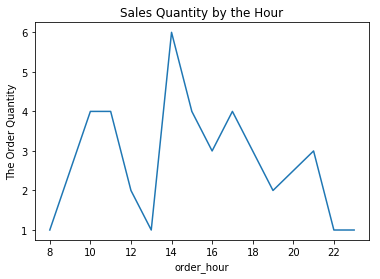

In [3]:
salesOrder.groupby('order_hour')['*:订单号'].count()
salesOrder.groupby('order_hour')['*:订单号'].count().plot()
plt.ylabel('The Order Quantity') 
plt.title('Sales Quantity by the Hour') 

<h4 style='color:red'><strong>how many product sales QTY by time</strong></h4>  

Text(0.5,1,'Product Sold Quantity by Hour')

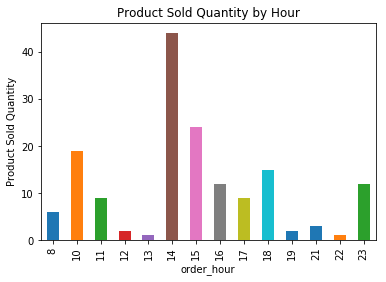

In [4]:
salesOrder.groupby('order_hour')['*:货品数量'].sum()  
salesOrder.groupby('order_hour')['*:货品数量'].sum().plot.bar()
plt.ylabel('Product Sold Quantity')
plt.title('Product Sold Quantity by Hour') 

<h4 style='color:red'><strong>how many product sales AMOUNT by time</strong></h4>   

Text(0.5,1,'Product Sales Amount by Hour')

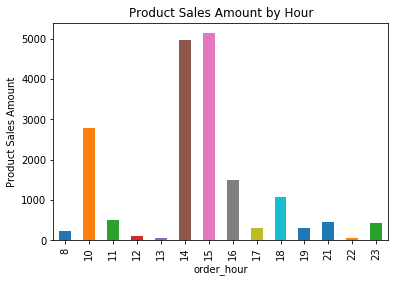

In [5]:
salesOrder.groupby('order_hour')['*:商品销售额'].sum()
salesOrder.groupby('order_hour')['*:商品销售额'].sum().plot.bar() 
plt.ylabel('Product Sales Amount') 
plt.title('Product Sales Amount by Hour') 

<p style='color:red'><strong>Average Order Value</strong></p> 

In [6]:
average_order_value= salesOrder['*:商品销售额'].sum()/salesOrder.loc[:,'*:订单号'].count() 
#salesThrough=salesOrder.loc[:,'*:货品种数'].sum()/salesOrder.loc[:,'*:订单号'].count()  
average_order_value 

457.3333333333333

<p style='color:red'><strong>Profit Margin</strong></p> 

In [7]:
profitMargin= 1-(salesOrder['*:商品成本'].sum()/salesOrder['*:商品销售额'].sum())
print('{:.2%} '.format(profitMargin))  

18.04% 


<p style='color:red'><strong>Final Discount Percentage</strong></p>  

In [8]:
finalDiscountPercentage= 1-(salesOrder['*:商品销售额'].sum()/salesOrder['*:商品总额'].sum()) 
print('{:.2%}'.format(finalDiscountPercentage))    

24.28%


<p style='color:red'><strong>sales amount by each shop</strong></p> 

*:店铺名称
deltaQcoffee-京东    6627
deltaq旗舰店-天猫       8433
deltaq有赞商城         2776
Name: *:商品销售额, dtype: int64


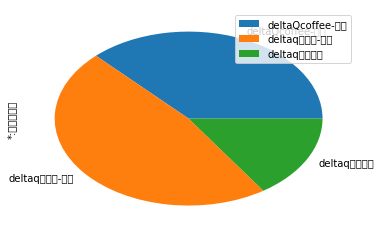

In [9]:
salesbyShop=salesOrder.groupby('*:店铺名称')['*:商品销售额'].sum()
print(salesbyShop)
salesbyShop.plot.pie() 
plt.legend(loc='upper right')   

In [10]:
with open('downloads/货品销售情况导出-2018-11-10-90.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
productSales=pd.read_csv('downloads/货品销售情况导出-2018-11-10-90.csv', 
            encoding=result['encoding']) 
with open('downloads/d11+delta+product+master.xlsx', 'rb') as f:
    result = chardet.detect(f.read()) 
productMaster=pd.read_excel('downloads/d11+delta+product+master.xlsx', 
            encoding=result['encoding']) 
productMaster.head()  
product_sales_master= pd.merge(productSales,productMaster,on='*:货号', how='left')
product_sales_master.columns
product_sales_master.to_excel('Product_Sales_Master.xlsx') 
product_sales_master.tail(2) 

,*:商品类型,*:品牌,*:商品编号,*:货号,*:货品名称,*:商品规格,*:销售单价,*:销售量,*:销售额,*:日均销售额,...,*:退货总额,*:平均成本,*:销售成本,*:销售平均毛利,*:销售毛利,*:销售毛利率,dfs_en_name,category,original_price,d11_price
23,咖啡粉/Powder,delta,COFFEE-UNIVERSAL-GROUND,5227052,岱塔研磨咖啡粉,NaN,0.0,3,0.0,0.0,...,0,39.43,118.29,-39.43,-118.29,0%,DECAFFEINATED COFFEE UNIV.GROUNG 250G,B&P,88.0,88.0
24,咖啡粉/Powder,delta,COFFEE-UNIVERSAL-GROUND-1,5014060,白金岱塔研磨咖啡粉250G|PLATINUM-COFFEE-UNIV.GROUND-250G...,烘焙程度:重度烘焙,88.0,3,264.0,8.8,...,0,45.42,136.26,42.58,127.74,48%,PLATINUM COFFEE UNIV.GROUND 250GR TIN,B&P,88.0,88.0


<ul>
    <li>all sales, sales amount,AUR,margin,draw the table, qty by category, table(only)</li>
    <li>AUR [AVERAGE UNIT BY RETAILING] by category</li>
    <li>margin by category</li>
    <li>orders (QTY) by the category</li>
</ul>    

category
QOOL         1
MILKQOOL     5
B&P         67
CAPSULES    82
Name: *:销售量, dtype: int64


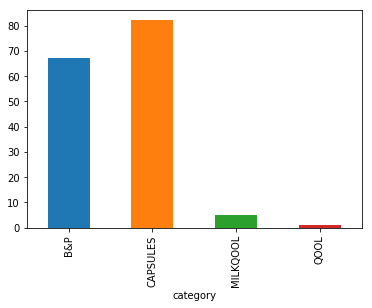

In [11]:
df_sales_c=product_sales_master.groupby('category')['*:销售量'].sum()
df_df_salesAmount_c=product_sales_master.groupby('category')['*:销售额'].sum() 
product_sales_master['AUR']=product_sales_master['*:销售额']/product_sales_master['*:销售量'] 
df_AUR=product_sales_master.groupby('category')['AUR'].sum() 
product_sales_master['margin_by_category']=1-(product_sales_master['*:销售成本']/product_sales_master['*:销售额']) 
df_margin_c=product_sales_master.groupby('category')['margin_by_category'].sum() 
product_sales_by_category=product_sales_master.groupby('category')['*:销售量'].sum() 
print(product_sales_by_category.sort_values())   
df_orders_qty_c=product_sales_by_category.plot.bar() 

<h4 style='color: red'>final discount by the category</h4> 

In [12]:
product_sales_master['Retail_of_goods']=product_sales_master['original_price']*product_sales_master['*:销售量']  
product_sales_master['final_discount']= 1- (product_sales_master['*:销售额']/product_sales_master['Retail_of_goods']) 
sales_category=product_sales_master.groupby(['category','final_discount'])['final_discount'].count() 
sales_category 

category  final_discount
B&P       0.000000          1
          0.129032          1
          0.170213          1
          0.200000          1
          0.248276          1
          0.348837          3
          1.000000          2
CAPSULES  0.309524          1
          0.322581          1
          0.338164          1
          0.434783          2
          0.554348          1
          0.745342          1
          0.916667          1
          1.000000          1
MILKQOOL  0.201040          1
          0.301811          1
          1.000000          1
QOOL      0.275735          1
Name: final_discount, dtype: int64

In [13]:
table_category=pd.DataFrame(dict(df_sales_c=df_sales_c,df_df_salesAmount_c=df_df_salesAmount_c, 
              df_AUR=df_AUR,df_margin_c=df_margin_c)).reset_index()
table_category 

,category,df_sales_c,df_df_salesAmount_c,df_AUR,df_margin_c
0,B&P,67,8565.0,954.600000,-inf
1,CAPSULES,82,2330.0,392.492063,-inf
2,MILKQOOL,5,6153.0,2976.333333,-inf
3,QOOL,1,788.0,788.000000,0.259467


<h4 style='color: red'><strong>order (QTY) by the product English name</strong></h4>   

In [14]:
product_sales_by_category=product_sales_master.groupby('dfs_en_name')['*:销售量'].sum()
table_productType=pd.DataFrame(product_sales_by_category) 
table_productType.sort_values(by='*:销售量') 

,*:销售量
dfs_en_name,
PLATINUM COFFEE BEANS 500 GR,1
DELTA Q 50 CAPS+QOOL EVO WHITE,1
DECAFFEINATED ROASTED COFFEE 1KG,1
DELTA Q 50 CAPS+DELTA Q MILKQOOL JADE LE,1
DELTA Q 50 CAPS+MILKQOOL BLUE,1
DELTA Q 50 CAPS+MILKQOOL BLACK,3
"CAPSULES PKG (7,3,5,8,9,10)",3
PLATINUM COFFEE UNIV.GROUND 250GR TIN,3
DECAFFEINATED COFFEE UNIV.GROUNG 250G,3


In [15]:
with open('downloads/products.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
productInventory=pd.read_csv('downloads/products.csv', 
            encoding=result['encoding']) 
productInventory.head(2)    

,*:货号,*:条形码,*:货品名称,*:规格,*:商品编码,*:库存,*:冻结库存,*:在途库存,*:单位,*:商品类型,*:录入日期
0,5227001,5601082036823,岱塔咖啡豆,低咖啡因豆|1000G,delta-COFFEE-BEANS,19,0,0,包,咖啡豆/Beans,2018-10-12
1,5010000,5601082034850,岱塔咖啡豆,钻石豆|1000G,delta-COFFEE-BEANS,28,0,0,包,咖啡豆/Beans,2018-10-12


In [16]:
product_sales_master_inventory= pd.merge(product_sales_master,productInventory,on='*:货号', how='left') 
product_sales_master_inventory.head(2)   

,*:商品类型_x,*:品牌,*:商品编号,*:货号,*:货品名称_x,*:商品规格,*:销售单价,*:销售量,*:销售额,*:日均销售额,...,*:条形码,*:货品名称_y,*:规格,*:商品编码,*:库存,*:冻结库存,*:在途库存,*:单位,*:商品类型_y,*:录入日期
0,咖啡粉/Powder,delta,COFFEE-UNIVERSAL-GROUND,5017052,岱塔研磨咖啡粉,烘焙程度:中度烘焙,56.0,8,448.0,14.933,...,5.601082e+12,岱塔研磨咖啡粉,220G|哥伦比亚,COFFEE-UNIVERSAL-GROUND,81.0,4.0,0.0,包,咖啡粉/Powder,2018-10-12
1,咖啡粉/Powder,delta,COFFEE-UNIVERSAL-GROUND,5016053,岱塔研磨咖啡粉,重量规格:220G;咖啡豆产地:安哥拉,56.0,6,336.0,11.200,...,5.601082e+12,岱塔研磨咖啡粉,220G|安哥拉,COFFEE-UNIVERSAL-GROUND,45.0,3.0,0.0,包,咖啡粉/Powder,2018-10-12


In [17]:
product_sales_master_inventory.groupby('category')['*:库存'].sum()  

category
B&P          416.0
CAPSULES    1495.0
MILKQOOL      95.0
QOOL          28.0
Name: *:库存, dtype: float64

In [18]:
product_sales=product_sales_master_inventory.groupby('dfs_en_name')['*:销售额'].sum()  
product_sales_qty= product_sales_master_inventory.groupby('dfs_en_name')['*:销售量'].sum() 
product_remaining_inventory=product_sales_master_inventory.groupby('dfs_en_name')['*:库存'].sum() 

In [19]:
table_inventory=pd.DataFrame(dict(product_sales=product_sales,
                                  product_sales_qty=product_sales_qty,   
                                 product_remaining_inventory=product_remaining_inventory)).reset_index()
table_inventory.sort_values(by='product_sales', ascending=False) 

,dfs_en_name,product_sales,product_sales_qty,product_remaining_inventory
8,DELTA Q 50 CAPS+MILKQOOL BLACK,4765.0,3,9.0
19,GOLD ROASTED COFFEE BEANS 1KG,3120.0,20,43.0
22,PLATINUM ROASTED COFFEE BEANS 1KG,2808.0,13,30.0
9,DELTA Q 50 CAPS+MILKQOOL BLUE,1388.0,1,36.0
4,COLOMBIA ROASTED COFFEE BEANS 1KG,1088.0,5,15.0
10,DELTA Q 50 CAPS+QOOL EVO WHITE,788.0,1,28.0
2,"CAPSULES PKG (7,3,5,8,9,10)",696.0,3,0.0
15,DELTA Q-QALIDUS COFFEE CAPSULES BOX 10UN,548.0,18,224.0
3,COLOMBIA COFFEE UNIVERSAL GROUND 220GR,448.0,8,81.0
1,BRASIL COFFEE UNIVERSAL GROUND 220GR,392.0,7,74.0
